Link: [Data Set](https://drive.google.com/drive/folders/1SYjwUrp2p7Nex7RLtPnxdSmqmDScs96r?usp=sharing)



In [55]:
pip install librosa

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Project Overview

We want to work with audio processing. In CS181 or "CS for all" we have really explored  
an incredible number of fields and we still can't believe we did all that in just 1 semester!  
The one thing that we haven't really gone in depth with in CS-181 is audio processing.  

The big picture conclusion is that the system should be able to take in as audio inputs from  
a large group of people then when given an audio input, should be able to recognize who said it  
  
For CS-181, this would be rather unfeasible. So, we came up with a more realistic goal  
Keeping that in mind, we wanted to create a simple audio classifier that can:  
- Take in audio inputs from us to train and test the model  
- After training, the model should be able to take in another input from either one of us (Umut or Aryaman)
- The model should be able to recognize who said the audio file

In [118]:
# Importing the necessary library for audio processing
# The library has been described in our project overview
import librosa
import librosa.display



In [119]:
# Let's try loading in a sample file!
filepath = "/Users/aryaman/Desktop/Umut Audio Files/Claremont McKenna College 10.wav"

In [120]:
data, sample_rate = librosa.load(filepath)

In [124]:
# Some F-Strings fun
print(f"Data Shape = {data.shape}")
print(f"Sample Rate = {sample_rate}")

Data Shape = (96432,)
Sample Rate = 22050


In [125]:
#importing the matplotlib pyplot library to show audo graph
import matplotlib.pyplot as plt

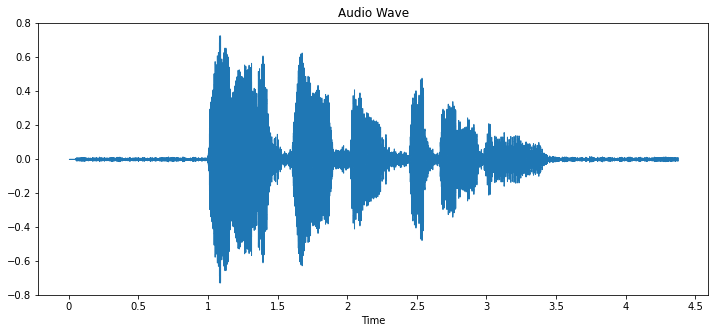

In [126]:
# What does an audio wave look like?
plt.figure(figsize=(12, 5))
plt.title("Audio Wave")
librosa.display.waveshow(data, sr=sample_rate)

In [128]:
# Importing the necessary library for number/data manipulation
import pandas as pd
import numpy as np
from array import *

### Feature Extraction Overview  
  
    
For the feature extraction, we tried many combinations and tried different extractions.  
Some of the problems we faced was that some of the audio features if extracted individually  
were way too long to work with. Then, we stumbled across the mfccs feature of an audio  
that is given by the librosa library.  
In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term   
power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a   
nonlinear mel scale of frequency. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum#:~:text=Mel%2Dfrequency%20cepstral%20coefficients%20(MFCCs,%2Da%2Dspectrum%22)))  

Here, we can control the number of features we can get through the n_mfcc input.  
For the purpose of our project, we decided that 40 would be a good number and therefore, we have 40 X values to  
predict 1 Y outcome

In [132]:
# Let's continue using the above sample audio file
# Extracting the data
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 189)
[[-5.73224426e+02 -5.38009644e+02 -4.54822174e+02 ... -4.73260712e+02
  -4.66779755e+02 -4.65655884e+02]
 [ 0.00000000e+00  4.15782356e+01  8.45581055e+01 ...  1.13769989e+02
   1.16848389e+02  1.13989525e+02]
 [ 0.00000000e+00  2.56454620e+01  2.41987019e+01 ...  5.75848541e+01
   5.23900566e+01  4.54080467e+01]
 ...
 [ 0.00000000e+00 -5.54740429e-01 -1.93196440e+00 ...  1.12382579e+00
   2.23613763e+00  6.71941519e+00]
 [ 0.00000000e+00 -2.52523303e+00 -8.60157204e+00 ... -1.90121078e+00
   2.47770929e+00  4.77219677e+00]
 [ 0.00000000e+00 -1.60486412e+00 -5.89275742e+00 ... -9.13209438e-01
   4.75175440e-01 -9.68285441e-01]]


[Text(0.5, 1.0, 'MFCC')]

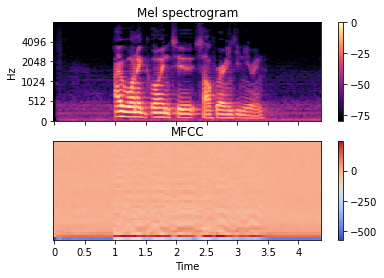

In [133]:
# Let's make some cool visualizations with the data!

S = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128,
                                   fmax=8000)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

In [137]:
"""
Helper function to features_Extractor
Inputs: 
file_name: name of the audio file

Output:
A list of length 40 where elements are the mfcc features of the audio file
"""
def features_extractor_helper(file_name):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [138]:
"""
Inputs: 
file_name: name of the audio file
num: The output or Y value. For the purpose of this program -> 1 = Aryaman, 0 = Umut

Output:
A list of length 41. The first 40 elements are the mfcc features of the audio file and the 
41st element is the output or Y value (who said the audio file)
"""
def features_extractor(file_name,num):
    F = features_extractor_helper(file_name)
    C = np.append(F,[num])
    return C.tolist()

In [139]:
#Sample Test Input for Features Extractor
features_extractor("/Users/aryaman/Desktop/Umut Audio Files/Claremont McKenna College 12.wav",0)

[-392.15179443359375,
 144.1132049560547,
 25.524799346923828,
 26.64370346069336,
 11.888808250427246,
 8.906105995178223,
 -3.208507776260376,
 -2.4174742698669434,
 -3.0580854415893555,
 -5.067340850830078,
 -6.666744709014893,
 -6.132622241973877,
 -3.1795403957366943,
 4.635306358337402,
 -0.7255995273590088,
 1.6241283416748047,
 -2.293023109436035,
 0.032294899225234985,
 4.852615833282471,
 3.8888871669769287,
 -3.544023275375366,
 -0.030438244342803955,
 1.2849797010421753,
 -3.7621636390686035,
 2.3637146949768066,
 0.8966922760009766,
 -1.768352746963501,
 -0.5916194915771484,
 1.4809582233428955,
 0.8663517236709595,
 1.2199088335037231,
 0.009718758054077625,
 -0.1681566834449768,
 0.17389421164989471,
 0.42693009972572327,
 -0.6052401661872864,
 0.11370774358510971,
 -1.3505446910858154,
 -2.1432368755340576,
 -0.5564480423927307,
 0.0]

In [145]:
cd

/Users/aryaman


In [146]:
cd Desktop

/Users/aryaman/Desktop


In [147]:
cd Umut\ Audio\ Files

/Users/aryaman/Desktop/Umut Audio Files


In [148]:
# X will store 40 lists of 41 elemts each. 20 of the lists will contain audio input data from Umut and the other 20 
# will contain audio input data from Aryaman
X = []

#### Cool Application of CS181 taught libraries!!!  

When we started inputting data, we started entering it manually for each audio file.  
This would have taken us ages as we had 40 audio files and copy pasting would have been a  
nightmare.  
Behold: the **os** library from the initial weeks of CS181!!  
Using what we learnt in the first week of class, we were able to shorten our code significantly,  
make it a lot more efficient and utilized another week of CS181 HWs




In [149]:
# import required module
import os
# assign directory
directory = "/Users/aryaman/Desktop/Umut Audio Files"
List = []
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    List = []
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        List = features_extractor(filename,0)
    if len(List) == 41:    
        X += [List]

In [152]:
# What does X look like right now?
X

[[-335.5745544433594,
  151.1183319091797,
  24.565887451171875,
  22.4261417388916,
  15.07429027557373,
  3.754021406173706,
  -5.722728729248047,
  -8.15362548828125,
  -1.7090389728546143,
  0.3573650121688843,
  -11.718263626098633,
  -8.718920707702637,
  -2.8771326541900635,
  0.5706886649131775,
  -1.589846134185791,
  3.6200191974639893,
  1.3367513418197632,
  -0.5762672424316406,
  2.547556161880493,
  3.633301258087158,
  -2.8037984371185303,
  -0.8825455904006958,
  1.3321068286895752,
  -4.285482883453369,
  -1.44792902469635,
  -1.4690810441970825,
  -0.6517918705940247,
  -1.5969406366348267,
  -0.3837071657180786,
  0.7127870917320251,
  2.0823919773101807,
  0.11306330561637878,
  -0.04774441197514534,
  0.11942512542009354,
  -1.3936388492584229,
  -1.1281620264053345,
  -0.9707858562469482,
  -1.6746281385421753,
  -1.3722938299179077,
  -1.8710330724716187,
  0.0],
 [-381.6517639160156,
  165.83335876464844,
  26.34246063232422,
  9.681328773498535,
  6.97313594818

In [151]:
# Let's check whether we have 20 files
len(X)

20

In [76]:
directory_ary_files = "/Users/aryaman/Desktop/Ary Audio Files in wav "

In [160]:

cd

/Users/aryaman


In [161]:
cd '/Users/aryaman/Desktop/Ary Audio Files in wav '

/Users/aryaman/Desktop/Ary Audio Files in wav 


In [162]:
# import required module
import os
# assign directory
directory = directory_ary_files
List = []
i = 0
# iterate over files in
# that directory
for filename_ in os.listdir(directory):
    # Filename check
    print(filename_)
    List = []
    f = os.path.join(directory, filename_)
    # checking if it is a file
    if os.path.isfile(f):
        List = features_extractor(filename_,1)
    if len(List) == 41:    
        X += [List]

Ary_"My_name_is_Aryaman"_1.wav
Ary_"My_name_is_Aryaman"_2.wav
Ary_"Pandas_is_my_favorite_library"_1.wav
Ary_"I_go_to_Claremont_McKenna_College"_2.wav
Ary_"Pandas_is_my_favorite_library"_2.wav
Ary_"I_go_to_Claremont_McKenna_College"_1.wav
Ary_"I_want_to_go_into_Software_Engineering"_1.wav
Ary_"CS181_is_amazing!"_1.wav
Ary_"I_want_to_go_into_Software_Engineering"_2.wav
Ary_"CS181_is_amazing!"_2.wav
Ary_"I_have_a_long_flight_home"_2.wav
Ary_"I_have_a_long_flight_home"_1.wav
Ary"_I_love_CMC"_2.wav
Ary_"I_want_to_go_into_Consulting "_1.wav
Ary_"I_want_to_go_into_Consulting"_2.wav
Ary_"Coachella_was_a_lot_of_fun"_2.wav
Ary_"I_love_CMC"_1.wav
Ary_"Coachella_was_a_lot_of_fun"_1.wav
Ary_"My_name_is_Umut"_1.wav
Ary_"My_name_is_Umut"_2.wav


In [163]:
#Checking if len is 20
len(X)

40

In [165]:
# If we missed something, this code cell woudl tell us
for i in X:
    if len(i) != 41:
        print("Error")

### End of Feature Extraction

### Start of Neural Nets

In [168]:
# Converting our list to array since we want to convert to float
data = np.array(X, dtype=np.float32)


In [170]:

A = data.astype('float64')
# Since we just inputted all our data, there is minimal data cleaning and data checking

In [171]:
print("+++ Start of regression prediction of pix52! +++\n")

X_all = A[:,0:40]  ### old: np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # horizontal concatenation
y_all = A[:,40]    # y (labels) ... is all rows, column indexed 52 (pix52) only (actually the 53rd pixel, but ok)

print(f"y_all (just target values, pix52)   is \n {y_all}") 
print(f"X_all (just features: 3 rows) is \n {X_all[:3,:]}")

+++ Start of regression prediction of pix52! +++

y_all (just target values, pix52)   is 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_all (just features: 3 rows) is 
 [[-3.35574554e+02  1.51118332e+02  2.45658875e+01  2.24261417e+01
   1.50742903e+01  3.75402141e+00 -5.72272873e+00 -8.15362549e+00
  -1.70903897e+00  3.57365012e-01 -1.17182636e+01 -8.71892071e+00
  -2.87713265e+00  5.70688665e-01 -1.58984613e+00  3.62001920e+00
   1.33675134e+00 -5.76267242e-01  2.54755616e+00  3.63330126e+00
  -2.80379844e+00 -8.82545590e-01  1.33210683e+00 -4.28548288e+00
  -1.44792902e+00 -1.46908104e+00 -6.51791871e-01 -1.59694064e+00
  -3.83707166e-01  7.12787092e-01  2.08239198e+00  1.13063306e-01
  -4.77444120e-02  1.19425125e-01 -1.39363885e+00 -1.12816203e+00
  -9.70785856e-01 -1.67462814e+00 -1.37229383e+00 -1.87103307e+00]
 [-3.81651764e+02  1.65833359e+02  2.63424606e+01  9.68132877e+00
   6.97313595e+00  4.764

In [172]:
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print("labels (target)\n",y_all)
print("features\n", X_all[:3,:])

labels (target)
 [1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.]
features
 [[-3.23926331e+02  1.25546951e+02 -1.03715105e+01  3.41436653e+01
  -6.61722660e+00 -1.16916418e+01 -4.93099630e-01 -2.83618760e+00
  -1.62128448e+01  2.79349148e-01 -7.68326902e+00  4.94420671e+00
   1.15823559e-01 -1.35724850e+01  5.50477695e+00 -6.65927792e+00
  -6.48413181e+00 -2.28209567e+00 -1.64349008e+00 -2.47405386e+00
  -7.48720217e+00 -3.27452087e+00 -3.00430727e+00 -5.76107407e+00
  -6.37156916e+00  4.73895103e-01 -6.28221369e+00 -7.92015553e+00
  -2.45458221e+00 -4.95382786e+00 -1.91207290e+00 -5.46649408e+00
  -5.26797724e+00 -3.22502398e+00 -2.98427939e+00 -4.64317274e+00
  -4.61263943e+00 -3.48859191e+00 -4.50650263e+00 -4.09788561e+00]
 [-3.67978668e+02  1.55218796e+02  2.54197769e+01  2.07875004e+01
   1.76292496e+01  8.86275959e+00 -6.05741262e+00 -7.48307419e+00
  -2.50039864e+00 -1.20402014e+00 -6.66662407e+00 -9.8900

In [173]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 32 rows;  testing with 8 rows

Held-out data... (testing data: 8)
y_test: [1. 1. 0. 0. 0. 0. 1. 0.]

X_test (few rows): [[-3.03259003e+02  1.47890778e+02 -4.21017885e+00  4.18721008e+01
   3.52772236e+00 -1.47997093e+01 -1.44431603e+00 -3.04877806e+00
  -1.22097406e+01 -1.58498538e+00 -7.22491837e+00 -2.02952757e-01
  -5.89331388e+00 -1.53731394e+01  1.05464585e-01 -4.69599390e+00
  -5.79150391e+00 -7.10242391e-01 -4.87286419e-01 -4.28599834e+00
  -6.42899084e+00 -2.95241380e+00 -2.88882875e+00 -8.40199089e+00
  -4.73146868e+00 -1.70546889e+00 -7.68783617e+00 -7.65505457e+00
  -4.48271084e+00 -2.74773002e+00 -3.95808721e+00 -6.55357027e+00
  -5.61855555e+00 -4.63861513e+00 -4.45428801e+00 -4.54470110e+00
  -4.58758593e+00 -4.59410477e+00 -4.59261513e+00 -4.04127884e+00]
 [-3.55644806e+02  1.27087410e+02 -1.50224762e+01  3.57530556e+01
  -3.30384493e+00 -9.14045620e+00 -1.85346425e+00 -4.04994440e+00
  -8.07779598e+00  4.35346699e+00 -6.03288269e+00  5.36194372e+00
  -1.50

In [174]:
#
# for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
#    This is done through the "StandardScaler" in scikit-learn
# 
USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

# we "train the scaler"  (computes the mean and standard deviation)
if USE_SCALER == True:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
else:
    # this one does no scaling!  We still create it to be consistent:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
    scaler.fit(X_train)  # still need to fit, though it does not change...

scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here is a fully-scaled dataset:

X_all_scaled = scaler.transform(X_all)
y_all_scaled = y_all.copy()      # not scaled


# Here are our scaled training and testing sets:

X_train_scaled = scaler.transform(X_train) # scale!
X_test_scaled = scaler.transform(X_test) # scale!

y_train_scaled = y_train  # the predicted/desired labels are not scaled
y_test_scaled = y_test  # not using the scaler

def ascii_table(X,y):
    """ print a table of binary inputs and outputs """
    print(f"{'input ':>70s} -> {'pred':<5s} {'des.':<5s}") 
    for i in range(len(y)):
        s_to_show = str(X[i,:])
        s_to_show = s_to_show[0:60]
        print(f"{s_to_show!s:>70s} -> {'?':<5s} {y[i]:<5.0f}")   # !s is str ...
    
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5])


                                                                input  -> pred  des. 
          [-0.88361924  1.82183627  1.1194834  -1.64060763 -0.13932633 -> ?     0    
          [-2.59117983 -0.74290284  1.74554892 -0.18777087  0.81527038 -> ?     0    
          [ 0.64832479  0.66594081  1.54084898 -1.21573367  0.29341928 -> ?     0    
          [ 0.88627003 -0.53106295 -0.86860615 -0.01312394 -1.83212027 -> ?     1    
          [ 0.18729483  0.62768161  0.6552645  -0.73619756  1.71183445 -> ?     0    


In [175]:

from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                    max_iter=200,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=False,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_regressor.fit(X_train_scaled, y_train_scaled)
print("++++++++++  TRAINING:   end  +++++++++++++++")

print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++


++++++++++  TRAINING:   end  +++++++++++++++
The (squared) prediction error (the loss) is 0.00025984140382205134
And, its square root: 0.01611959688770322


In [177]:
def ascii_table_for_regressor(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc) # all predictions
    Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
    # measure error
    error = 0.0
    # printing
    print(f"{'input ':>35s} ->  {'pred':^6s}  {'des.':^6s}  {'absdiff':^10s}") 
    for i in range(len(y)):
        pred = predictions[i]
        desired = y[i]
        result = abs(desired - pred)
        error += result
        # Xpr = Xsc   # if you'd like to see the scaled values
        s_to_show = str(Xpr[i,:])
        s_to_show = s_to_show[0:25]  # we'll just take 25 of these
        print(f"{s_to_show!s:>35s} ->  {pred:<+6.3f}  {desired:<+6.3f}  {result:^10.3f}") 

    print("\n" + "+++++   +++++      +++++   +++++   ")
    print(f"average abs error: {error/len(y)}")
    print("+++++   +++++      +++++   +++++   ")
    
#
# let's see how it did on the test data 
# 
if True:
    ascii_table_for_regressor(X_test_scaled,
                            y_test_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above

# and how it did on the training data!
#
if False:
    ascii_table_for_regressor(X_train_scaled,
                            y_train_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above

                             input  ->   pred    des.    absdiff  
          [-3.03259003e+02  1.47890 ->  +0.994  +1.000    0.006   
          [-355.64480591  127.08740 ->  +1.046  +1.000    0.046   
          [-4.03289490e+02  1.69182 ->  +0.009  +0.000    0.009   
          [-3.85139282e+02  1.65877 ->  -0.023  +0.000    0.023   
          [-3.73114655e+02  1.69996 ->  +0.002  +0.000    0.002   
          [-3.50940155e+02  1.39592 ->  -0.037  +0.000    0.037   
          [-335.35964966  148.44007 ->  +0.971  +1.000    0.029   
          [-4.49256683e+02  1.36099 ->  -0.057  +0.000    0.057   

+++++   +++++      +++++   +++++   
average abs error: 0.02597979352412689
+++++   +++++      +++++   +++++   


In [178]:

from sklearn.neural_network import MLPClassifier

#
# Here's where you can change the number of hidden layers
# and number of neurons!
#
nn_classifier = MLPClassifier(hidden_layer_sizes=(6,7),  # 3 input -> 6 -> 7 -> 1 output
                    max_iter=500,      # how many times to train
                    activation="tanh", # the "activation function" input -> output
                    solver='sgd',      # the algorithm for optimizing weights
                    verbose=True,      # False to "mute" the training
                    shuffle=True,      # reshuffle the training epochs?
                    random_state=None, # set for reproduceability
                    learning_rate_init=.1,       # learning rate: % of error to backprop
                    learning_rate = 'adaptive')  # soften feedback as it converges

# documentation:
# scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 
#     Try verbose / activation "relu" / other network sizes ...

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_classifier.fit(X_train_scaled, y_train_scaled)
print("\n++++++++++  TRAINING:   end  +++++++++++++++")
print(f"The analog prediction error (the loss) is {nn_classifier.loss_}")



++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 0.55743119
Iteration 2, loss = 0.39956608
Iteration 3, loss = 0.29742863
Iteration 4, loss = 0.21647990
Iteration 5, loss = 0.15514767
Iteration 6, loss = 0.11171594
Iteration 7, loss = 0.08199164
Iteration 8, loss = 0.06157717
Iteration 9, loss = 0.04725482
Iteration 10, loss = 0.03696111
Iteration 11, loss = 0.02940371
Iteration 12, loss = 0.02375587
Iteration 13, loss = 0.01947105
Iteration 14, loss = 0.01617697
Iteration 15, loss = 0.01361392
Iteration 16, loss = 0.01159730
Iteration 17, loss = 0.00999387
Iteration 18, loss = 0.00870626
Iteration 19, loss = 0.00766245
Iteration 20, loss = 0.00680867
Iteration 21, loss = 0.00610435
Iteration 22, loss = 0.00551862
Iteration 23, loss = 0.00502776
Iteration 24, loss = 0.00461342
Iteration 25, loss = 0.00426128
Iteration 26, loss = 0.00396003
Iteration 27, loss = 0.00370076
Iteration 28, loss = 0.00347631
Iteration 29, loss = 0.00328093
Iteration 30, loss = 0.00310998

In [201]:
#
# how did it do on the testing data?
#

#
# which one do we want: classifier or regressor?
#

def ascii_table_for_classifier(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc)            # all predictions
    prediction_probs = nn.predict_proba(Xsc) # all prediction probabilities
    Xpr = scaler.inverse_transform(Xsc)      # Xpr is the "X to print": unscaled data!
    # count correct
    num_correct = 0
    # printing
    print(f"{'input ':>28s} -> {'pred':^6s} {'des.':^6s}") 
    for i in range(len(y)):
        pred = predictions[i]
        pred_probs = prediction_probs[i,:]
        desired = y[i]
        if pred != desired: result = "  incorrect: " + str(pred_probs)
        else: result = "  correct"; num_correct += 1
        # Xpr = Xsc  # if you want to see the scaled versions
        print(f"{Xpr[i,:]!s:>28s} -> {pred:^6.0f} {desired:^6.0f} {result:^10s}") 
    print(f"\ncorrect predictions: {num_correct} out of {len(y)}")
    


#
# let's see how it did on the test data (also the training data!)
#
ascii_table_for_classifier(X_test_scaled,
                           y_test_scaled,
                           nn_classifier,
                           scaler)   
#
# other things...
#
if False:  # do we want to see all of the parameters?
    nn = nn_classifier  # less to type?
    print("\n\n+++++ parameters, weights, etc. +++++\n")
    print(f"\nweights/coefficients:\n")
    for wts in nn.coefs_:
        print(wts)
    print(f"\nintercepts: {nn.intercepts_}")
    print(f"\nall parameters: {nn.get_params()}")

                      input  ->  pred   des. 
[-3.03259003e+02  1.47890778e+02 -4.21017885e+00  4.18721008e+01
  3.52772236e+00 -1.47997093e+01 -1.44431603e+00 -3.04877806e+00
 -1.22097406e+01 -1.58498538e+00 -7.22491837e+00 -2.02952757e-01
 -5.89331388e+00 -1.53731394e+01  1.05464585e-01 -4.69599390e+00
 -5.79150391e+00 -7.10242391e-01 -4.87286419e-01 -4.28599834e+00
 -6.42899084e+00 -2.95241380e+00 -2.88882875e+00 -8.40199089e+00
 -4.73146868e+00 -1.70546889e+00 -7.68783617e+00 -7.65505457e+00
 -4.48271084e+00 -2.74773002e+00 -3.95808721e+00 -6.55357027e+00
 -5.61855555e+00 -4.63861513e+00 -4.45428801e+00 -4.54470110e+00
 -4.58758593e+00 -4.59410477e+00 -4.59261513e+00 -4.04127884e+00] ->   1      1      correct 
[-355.64480591  127.08740997  -15.0224762    35.75305557   -3.30384493
   -9.1404562    -1.85346425   -4.0499444    -8.07779598    4.35346699
   -6.03288269    5.36194372   -1.50120282  -16.6372776     2.61830497
   -4.97013187   -3.77620077   -1.18773532   -2.58207846   -3.

### Results Overview:  
We got all our predictions correct and the error in the model is pretty small [average abs error = 0.02597979352412689]
We consider the model to be successful thus far. We want to give it some new data -> some more predictions and see how it performs

In [181]:
data_newTest = []

In [182]:
cd

/Users/aryaman


In [183]:
cd Desktop

/Users/aryaman/Desktop


In [184]:
cd '/Users/aryaman/Desktop/Predict Test'

/Users/aryaman/Desktop/Predict Test


In [185]:
directory_predict = '/Users/aryaman/Desktop/Predict Test'

In [186]:
# import required module
import os
# assign directory
directory = "/Users/aryaman/Desktop/Predict Test"
List = []
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    List = []
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if "Umut" in filename:
            List = features_extractor(filename,0)
        elif "Ary" in filename:
            List = features_extractor(filename,1)


    if len(List) == 41:    
        data_newTest += [List]

In [187]:
len(data_newTest)

10

In [194]:
data_newTest = np.array(data_newTest, dtype=np.float32)

In [197]:
X_predict = data_newTest[:,0:40]  
Y_predict = data_newTest[:,40]  


In [202]:
X_predict_scaled = scaler.transform(X_predict) # scale!

y_predict_scaled = Y_predict  # the predicted/desired labels are not scaled


In [203]:
ascii_table_for_classifier(X_predict_scaled,
                           y_predict_scaled,
                           nn_classifier,
                           scaler)  

                      input  ->  pred   des. 
[-378.96896     94.854034     6.175004    23.54618     -1.8603139
   13.598962   -10.041586    -4.2601337  -11.747032     3.3148367
  -10.461628    -2.9576468   -5.481562    -6.3471894    5.2055764
   -2.9561248   -4.5524397   -1.0531539   -1.9102906   -3.4808578
   -4.076097    -1.9717191   -4.4476995   -3.3600647   -4.0810266
   -3.2906513   -4.314672    -4.4653063   -2.4879909   -5.0136776
   -2.496499    -4.8620124   -2.4703376   -4.8263063   -2.6593401
   -3.734054    -4.069719    -3.7513719   -3.3875952   -2.9953523] ->   1      1      correct 
[-3.35084106e+02  1.20914055e+02 -8.14970434e-01  3.27297325e+01
  3.32461357e+00  5.74076271e+00 -1.48997822e+01 -1.80323020e-01
 -6.19880915e+00  4.06850672e+00 -1.54622183e+01 -5.58141518e+00
 -3.20420384e+00 -6.45292521e+00  7.15632820e+00 -9.81709003e+00
 -6.80490303e+00  1.35663593e+00 -3.70384526e+00 -2.31203079e+00
 -4.77457285e+00 -1.87172008e+00 -5.74149799e+00 -1.74481845e+00
 -5.548

### Final Summary  

Used MFCC and implemented neural networks for data set.  
Gave it 10 new inputs and it still managed to predict everything accurately.  
